In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('india.csv')

In [3]:
df.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


In [4]:
df.shape

(779, 16)

In [35]:
df.columns

Index(['date', 'confirmed', 'vaccines', 'people_vaccinated',
       'people_fully_vaccinated', 'school_closing', 'workplace_closing',
       'cancel_events', 'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'contact_tracing', 'facial_coverings'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

In [6]:
df.isnull().sum()

date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64

In [7]:
# droping null values which are less in numbers
columns_to_check = ['school_closing', 'workplace_closing', 'cancel_events', 
                    'gatherings_restrictions', 'transport_closing', 
                    'stay_home_restrictions', 'internal_movement_restrictions', 
                    'international_movement_restrictions', 'information_campaigns', 
                    'contact_tracing', 'facial_coverings','confirmed']


df_cleaned = df.dropna(subset=columns_to_check)


print(df_cleaned.isnull().sum())

date                                     0
confirmed                                0
vaccines                                 0
people_vaccinated                      362
people_fully_vaccinated                391
school_closing                           0
workplace_closing                        0
cancel_events                            0
gatherings_restrictions                  0
transport_closing                        0
stay_home_restrictions                   0
internal_movement_restrictions           0
international_movement_restrictions      0
information_campaigns                    0
contact_tracing                          0
facial_coverings                         0
dtype: int64


In [8]:
# Impute missing values with zero for people_vaccinated and people_fully_vaccinated because the null values are  
# at starting or first so no people were vaccinated 

df_cleaned['people_vaccinated'].fillna(0, inplace=True)
df_cleaned['people_fully_vaccinated'].fillna(0, inplace=True)


print(df_cleaned.isnull().sum())


date                                   0
confirmed                              0
vaccines                               0
people_vaccinated                      0
people_fully_vaccinated                0
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64


C:\Users\Jash\AppData\Local\Temp\ipykernel_8376\1237310436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['people_vaccinated'].fillna(0, inplace=True)
C:\Users\Jash\AppData\Local\Temp\ipykernel_8376\1237310436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['people_fully_vaccinated'].fillna(0, inplace=True)


In [9]:
#  Descriptive Statistics

cases_stats = df_cleaned['confirmed'].describe()

measures_stats = df_cleaned[['school_closing', 'workplace_closing', 'gatherings_restrictions', 
                              'stay_home_restrictions', 'transport_closing', 'contact_tracing', 
                              'facial_coverings']].describe()

print("Summary statistics for daily cases:")
print(cases_stats)
print("\nSummary statistics for lockdown measures:")
print(measures_stats)


Summary statistics for daily cases:
count    7.610000e+02
mean     1.663606e+07
std      1.450341e+07
min      1.000000e+00
25%      2.088611e+06
50%      1.090494e+07
75%      3.244931e+07
max      4.293104e+07
Name: confirmed, dtype: float64

Summary statistics for lockdown measures:
       school_closing  workplace_closing  gatherings_restrictions  \
count      761.000000         761.000000               761.000000   
mean        -0.867280          -1.821288                -2.812089   
std          2.439692           1.456246                 2.138042   
min         -3.000000          -3.000000                -4.000000   
25%         -3.000000          -3.000000                -4.000000   
50%         -2.000000          -2.000000                -4.000000   
75%          3.000000          -2.000000                -2.000000   
max          3.000000           3.000000                 4.000000   

       stay_home_restrictions  transport_closing  contact_tracing  \
count              761

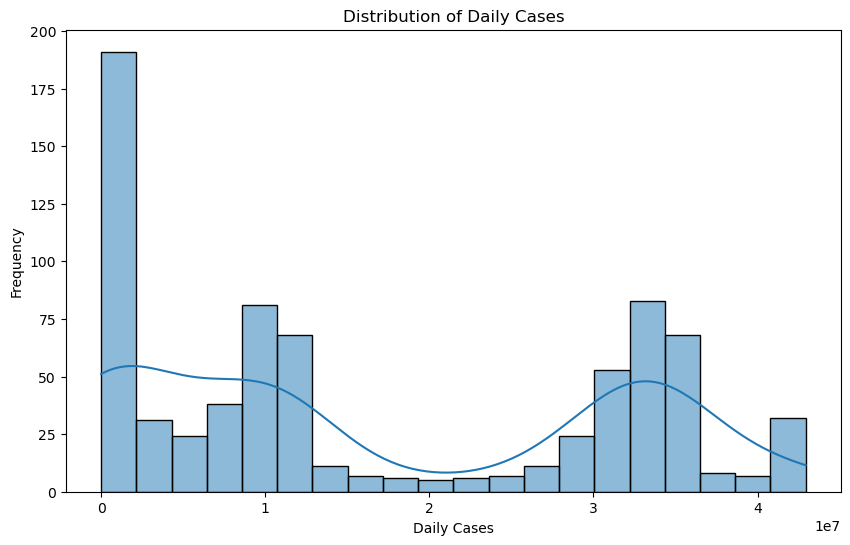

In [10]:
# Visualization
# Histogram of daily cases

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['confirmed'], bins=20, kde=True)
plt.title('Distribution of Daily Cases')
plt.xlabel('Daily Cases')
plt.ylabel('Frequency')
plt.show()

In [22]:
df_cleaned['date'] = pd.to_datetime(df['date'])

# Create a new column to represent the year and month
df_cleaned['year_month'] = df_cleaned['date'].dt.to_period('M')
df_cleaned['year_month'] = df_cleaned['year_month'].astype(str)

C:\Users\Jash\AppData\Local\Temp\ipykernel_8376\1336461785.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_cleaned['date'] = pd.to_datetime(df['date'])
C:\Users\Jash\AppData\Local\Temp\ipykernel_8376\1336461785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df['date'])
C:\Users\Jash\AppData\Local\Temp\ipykernel_8376\1336461785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

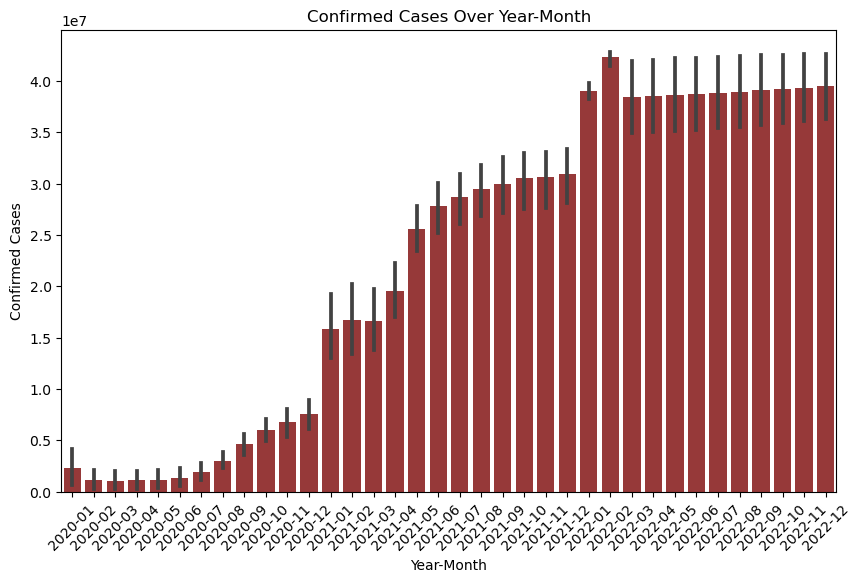

In [27]:
# lets see Confirmed Cases Over Year-Month
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x='year_month', y='confirmed', color='brown')
plt.title('Confirmed Cases Over Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

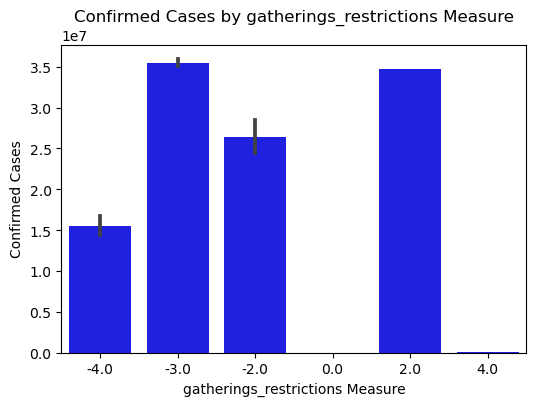

In [28]:
# lets compare confirmed cases with different lockdown measures
plt.figure(figsize=(6, 4))
sns.barplot(data=df_cleaned, x='gatherings_restrictions', y='confirmed', color='blue')
plt.title('Confirmed Cases by gatherings_restrictions Measure')
plt.xlabel('gatherings_restrictions Measure')
plt.ylabel('Confirmed Cases')
plt.show()

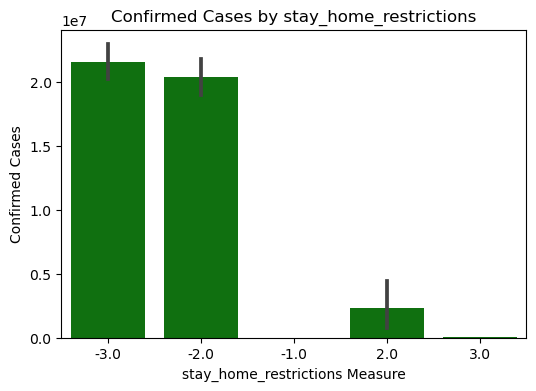

In [29]:
#  lets compare confirmed cases with stay_home_restrictions
plt.figure(figsize=(6, 4))
sns.barplot(data=df_cleaned, x='stay_home_restrictions', y='confirmed', color='green')
plt.title('Confirmed Cases by stay_home_restrictions')
plt.xlabel('stay_home_restrictions Measure')
plt.ylabel('Confirmed Cases')
plt.show()

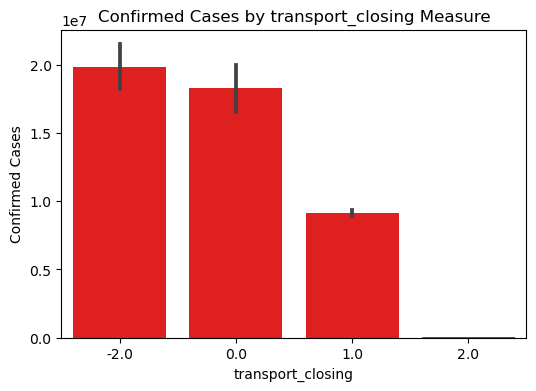

In [30]:
# lets compare confirmed cases with transport_closing
plt.figure(figsize=(6, 4))
sns.barplot(data=df_cleaned, x='transport_closing', y='confirmed', color='red')
plt.title('Confirmed Cases by transport_closing Measure')
plt.xlabel('transport_closing')
plt.ylabel('Confirmed Cases')
plt.show()

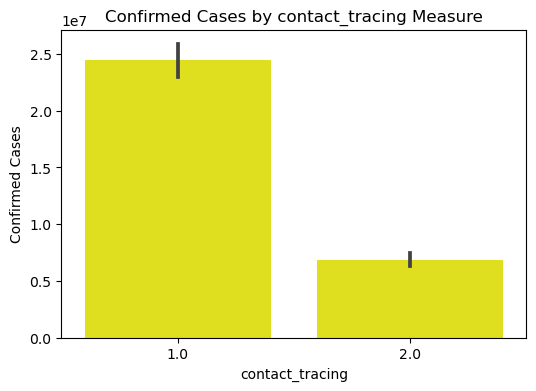

In [32]:
# lets compare confirmed cases with contact_tracing
plt.figure(figsize=(6, 4))
sns.barplot(data=df_cleaned, x='contact_tracing', y='confirmed', color='yellow')
plt.title('Confirmed Cases by contact_tracing Measure')
plt.xlabel('contact_tracing')
plt.ylabel('Confirmed Cases')
plt.show()

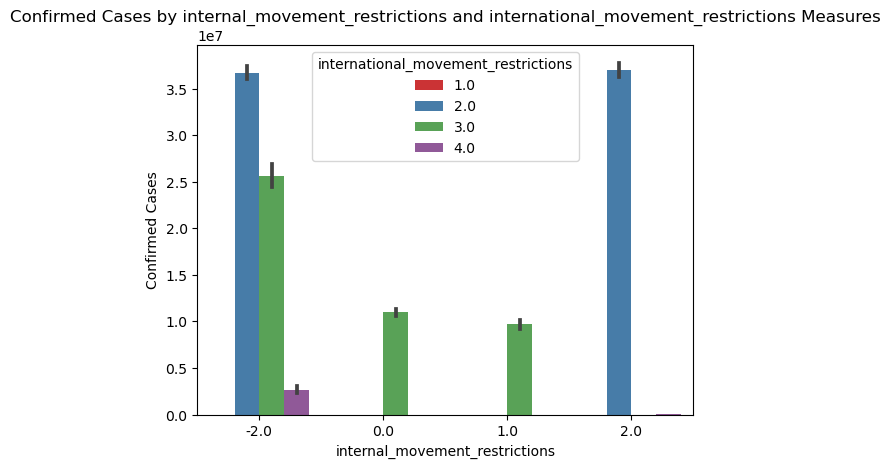

In [33]:
# now lets compare internal_movement_restrictions and international_movement_restrictions measures simultaneously


sns.barplot(data=df_cleaned, x='internal_movement_restrictions', y='confirmed', hue='international_movement_restrictions', palette='Set1')
plt.title('Confirmed Cases by internal_movement_restrictions and international_movement_restrictions Measures')
plt.xlabel('internal_movement_restrictions')
plt.ylabel('Confirmed Cases')
plt.legend(title='international_movement_restrictions')
plt.show()

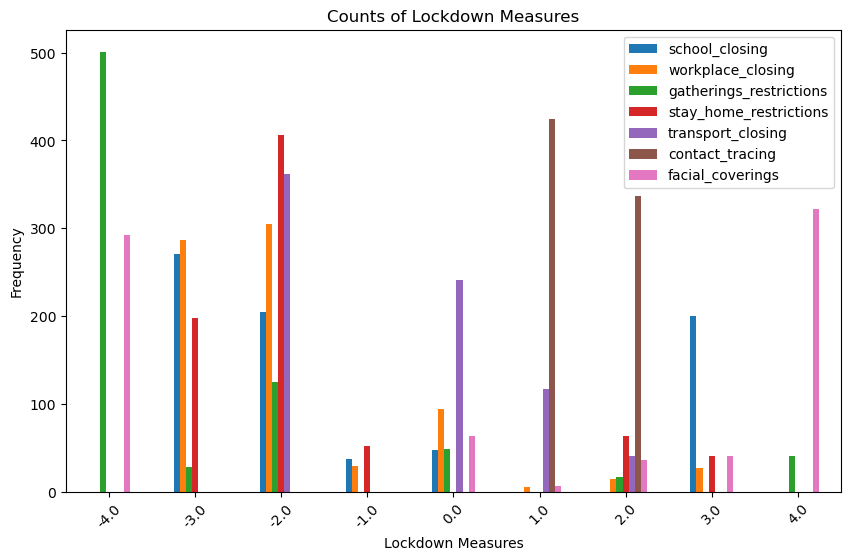

In [11]:
# Bar plot of lockdown measures
lockdown_measures_counts = df_cleaned[['school_closing', 'workplace_closing', 'gatherings_restrictions', 
                               'stay_home_restrictions', 'transport_closing', 'contact_tracing', 
                               'facial_coverings']].apply(pd.Series.value_counts)
lockdown_measures_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Lockdown Measures')
plt.xlabel('Lockdown Measures')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

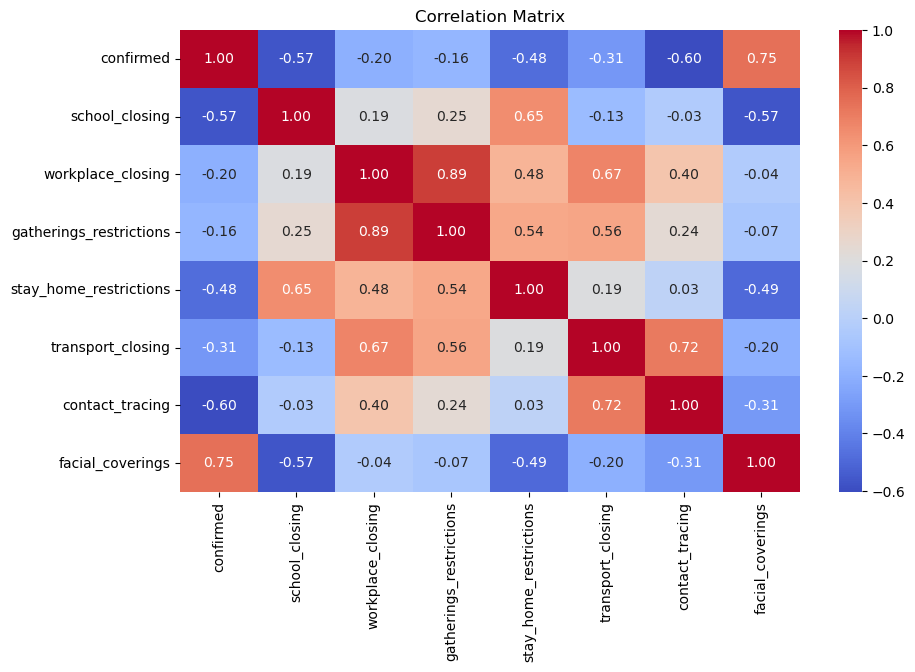

In [12]:
# Correlation Analysis
correlation_matrix = df_cleaned[['confirmed', 'school_closing', 'workplace_closing', 'gatherings_restrictions', 
                         'stay_home_restrictions', 'transport_closing', 'contact_tracing', 
                         'facial_coverings']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# closing workplace_closing was very controversial measures lets see does it has any effect on cases
# we perform ANOVA test for this

from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(
    df_cleaned[df_cleaned['workplace_closing'] == 0]['confirmed'],
    df_cleaned[df_cleaned['workplace_closing'] == 1]['confirmed'],
    df_cleaned[df_cleaned['workplace_closing'] == 2]['confirmed'],
    df_cleaned[df_cleaned['workplace_closing'] == 3]['confirmed']
)

# Print ANOVA results
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 15.520593946763778
ANOVA p-value: 9.729633518465233e-09


In [20]:
# the ANOVA F-statistic is 15.52 and the p-value is approximately 9.73 
# we can conclude that there are significant differences in the mean daily confirmed cases 
# across different levels of workplace closure
# workplace closure likely contributed to a decrease in confirmed cases.

In [ ]:
# similarly lets check if facial_coverings has some impact on cases

In [21]:
f_statistic, p_value = f_oneway(df_cleaned[df_cleaned['facial_coverings'] == 0]['confirmed'],
                                 df_cleaned[df_cleaned['facial_coverings'] == 1]['confirmed'],
                                 df_cleaned[df_cleaned['facial_coverings'] == 2]['confirmed'],
                                 df_cleaned[df_cleaned['facial_coverings'] == 3]['confirmed'])

# Print results
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 24882.934967377365
ANOVA p-value: 4.0497678676740093e-194


In [ ]:
#  there are significant differences in the mean daily confirmed cases across different levels of facial coverings.
# In other words, the implementation of facial coverings appears to have a substantial impact on reducing the number of cases.

In [ ]:
# while lockdowns were hoped to reduce COVID-19 cases, recent studies show they don't always work as expected.
# Based on my analysis, it appears that certain lockdown measures have an impact on decreasing COVID-19 cases.
# This suggests implementing specific measures can help mitigate the spread of the virus and potentially reduce infection rates.

In [ ]:
# thankyou